- codificar.py: programa que oculta mensagem de texto na imagem.
- decodificar.py: programa que recupera mensagem de texto da imagem.
- imagem_entrada.png: imagem no formato PNG em que sera embutida a mensagem. ´
- imagem_saida.png: imagem no formato PNG com mensagem embutida.
- texto_entrada.txt: arquivo-texto contendo mensagem a ser oculta.
- texto_saida.txt: arquivo-texto contendo mensagem recuperada.
- plano_bits: trˆes planos de bits menos significativos representados pelos valores 0, 1 ou 2.

In [2]:
import numpy as np
# import cv2
import matplotlib.pyplot as plt
import math
import tqdm

In [3]:
#Lib to define the argument when call the file
import argparse

In [3]:
# Paramets to read the origin image and text file
parser = argparse.ArgumentParser(description='Stenographing')
parser.add_argument('--input_image', default='baboon.png', help='Name of the input Image')
parser.add_argument('--input_text', default='input_text.txt', help='Name of input text to stenograph')
parser.add_argument('--bit_plain', default=2, help='Set how many bits will be used to stenograph  the mensage (1,2 or 3)')
parser.add_argument('--out_image', default='output_image.png', help='Name of input text to stenograph')
parser.add_argument('--out_text', default='output_text.txt', help='Name of output text to stenograph')

parser.add_argument('-f')
opt = parser.parse_args()

## Read Image

In [6]:
import imageio.v3 as iio

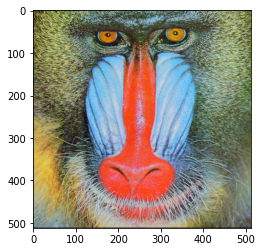

In [5]:
img = iio.imread(opt.input_image)
plt.imshow(img)
plt.show()

## Convert image to binary

In [6]:
width = img.shape[0] 
height = img.shape[1]

## Converting mesage to bits

### Text to binary

In [7]:
def toBinary(string):
    binary_string = ''.join(format(ord(x), 'b').zfill(8) for x in string)
    return binary_string

In [8]:
#Code to find the inittial and final of message
secrect_code = "@@@A@@!"
bin_secrect_code = toBinary(secrect_code)
bin_secrect_code

'01000000010000000100000001000001010000000100000000100001'

### Read the text file

In [9]:
with open(opt.input_text) as f:
    lines = f.readlines()

In [10]:
#A scratch message to test
scratch_msg = toBinary(lines[0])
len(scratch_msg)

1864

In [11]:
test_to_write = bin_secrect_code + scratch_msg + bin_secrect_code
len(test_to_write)

1976

In [1]:
1976/2

988.0

### Insert message into bits

In [12]:
bin_msg = test_to_write

In [13]:
msg_size = len(bin_msg)
msg_size

1976

In [14]:
bin_msg_int = np.array([int(char) for char in bin_msg])

In [15]:
BIT_MAP = opt.bit_plain

In [16]:
#Test if the image have suficient rows to mensagem
rows_mensage = int(len(bin_msg_int)/BIT_MAP)
rows_mensage

988

In [17]:
msg_formated = bin_msg_int.reshape(rows_mensage, BIT_MAP)

In [18]:
def bool2int(x):
    y = 0
    for i,j in enumerate(x):
        y += j<<i
    return y

## Writing mensage into image

In [19]:
def array_to_string(array):
    try:
        string_array = ''.join(c for c in array if c.isdigit())
    except:
        array = np.array2string(array)
        string_array = ''.join(c for c in array if c.isdigit())
    return string_array

In [20]:
img1 = img.copy()
width_count = 0
height_count = 0
color_chanel_count = 0
list_bins = []

for row in tqdm.tqdm(msg_formated, desc="Hidding the text"):
    pt1 = format(img[width_count, height_count, color_chanel_count], '08b')[:8-BIT_MAP]
    pt2 = array_to_string(row)
#     list_bins.append(pt2+pt1)
    img1[width_count, height_count, color_chanel_count] = int(pt1+pt2, 2)
    
    if color_chanel_count < 2:
        color_chanel_count += 1
    else:
        color_chanel_count = 0
        
    if width_count == width-1:
#         print(f"width_count: {width_count}\nheight_count: {height_count}\ncolor_chanel_count: {color_chanel_count} ")
        width_count = 0
        height_count += 1
    else:
        width_count += 1
        
    if height_count == height-1:
        height_count = 0
#         color_chanel_count += 1
        
    if color_chanel_count == 3:
        print("This image don't support the size of the text.")
        break

Hidding the text: 100%|████████████████████████████████████████████████████████████| 988/988 [00:00<00:00, 6213.62it/s]


### Save the image

In [21]:
np.unique(img1 == img, return_counts=True)

(array([False,  True]), array([   734, 785698], dtype=int64))

In [22]:
iio.imwrite(opt.out_image, img1)
# cv2.imwrite('baboon_text_cv2.png', img1)

In [23]:
# cv2.imshow("image", img1)
# cv2.waitKey()

## Exctrating the text from image

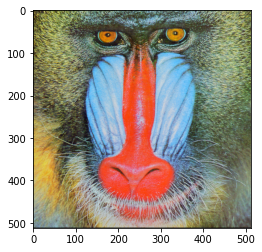

In [24]:
# img_read = cv2.imread(opt.out_image)
img_read = iio.imread(opt.out_image)
# img_read = cv2.imread('baboon_text_cv2.png')
# rgb_read_img = cv2.cvtColor(img_read, cv2.COLOR_BGR2RGB)

plt.imshow(img_read)
plt.show()

In [25]:
# list_caracteres = []

# for count, row in enumerate(img_read[0]):

#     list_caracteres.append(format(img_read[0][count][0], '08b')[8-BIT_MAP:])

In [26]:
# img1

In [27]:
list_caracteres = []

width_count = 0
height_count = 0
color_chanel_count = 0

for pixel in tqdm.tqdm(range(img_read.size), desc="Looking for hidden text"):

    list_caracteres.append(format(img_read[width_count, height_count, color_chanel_count], '08b')[8-BIT_MAP:])
    
    if color_chanel_count < 2:
        color_chanel_count += 1
    else:
        color_chanel_count = 0
        
    if width_count == width-1:
        width_count = 0
        height_count += 1
    else:
        width_count += 1
        
    if height_count == height-1:
        height_count = 0
    

Looking for hidden text: 100%|█████████████████████████████████████████████| 786432/786432 [00:02<00:00, 357244.73it/s]


In [28]:
import re

In [29]:
binary_channel = array_to_string(np.reshape(list_caracteres, -1))

In [30]:
extracted_text = re.search(rf"{bin_secrect_code}(.*?){bin_secrect_code}", binary_channel).group(1)

In [31]:
exctracted_list = re.findall('........?', extracted_text)

In [32]:
decifred_word = ''

for word in exctracted_list:
    decifred_word += (chr(int(word, 2)))

In [33]:
decifred_word

'Esse e o texto de input e nele Ã© que estÃ£o todas as mensagens e caracteres necessarios para descrever e testar se o codigo esta e ira funcionar de forma correta, espero que apresente nenhum problema. Senao estarei em serios apuros.'

In [34]:
with open(opt.out_text, "w") as text_file:
    print(decifred_word, file=text_file)

## Ploting each bit representation

In [35]:
def plot_all_bit_planes(img_read, width, height, color_chanel=0):

    fig, axs = plt.subplots(2, 4,figsize=(15,6))

    chanel = 7
#     color_chanel = 0

    axs[0, 0].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,0])
    axs[0, 0].set_title(f'Bit {chanel}')

    axs[0, 1].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,1])
    axs[0, 1].set_title(f'Bit {chanel-1}')

    axs[0, 2].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,2])
    axs[0, 2].set_title(f'Bit {chanel-2}')

    axs[0, 3].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,3])
    axs[0, 3].set_title(f'Bit {chanel-3}')

    axs[1, 0].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,4])
    axs[1, 0].set_title(f'Bit {chanel-4}')

    axs[1, 1].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,5])
    axs[1, 1].set_title(f'Bit {chanel-5}')

    axs[1, 2].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,6])
    axs[1, 2].set_title(f'Bit {chanel-6}')

    axs[1, 3].imshow(np.unpackbits(img_read[:,:,color_chanel]).reshape([width, height,8])[:,:,7])
    axs[1, 3].set_title(f'Bit {chanel-7}')

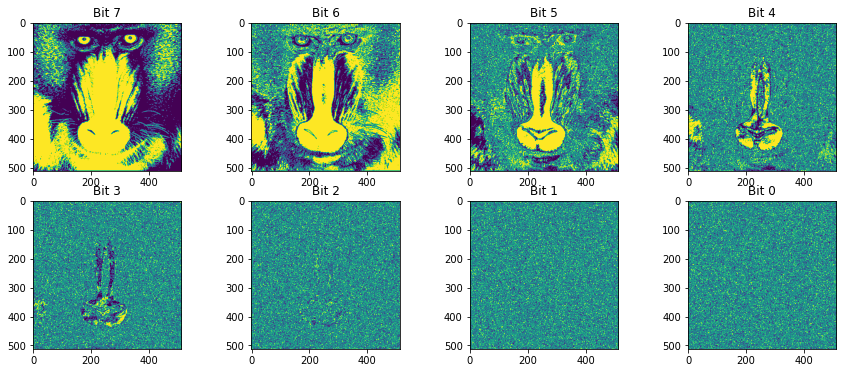

In [36]:
plot_all_bit_planes(img_read, width, height, 0)

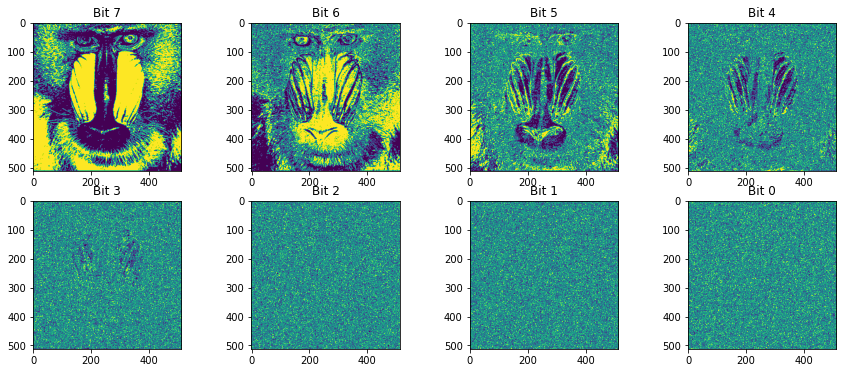

In [37]:
plot_all_bit_planes(img, width, height, 1)

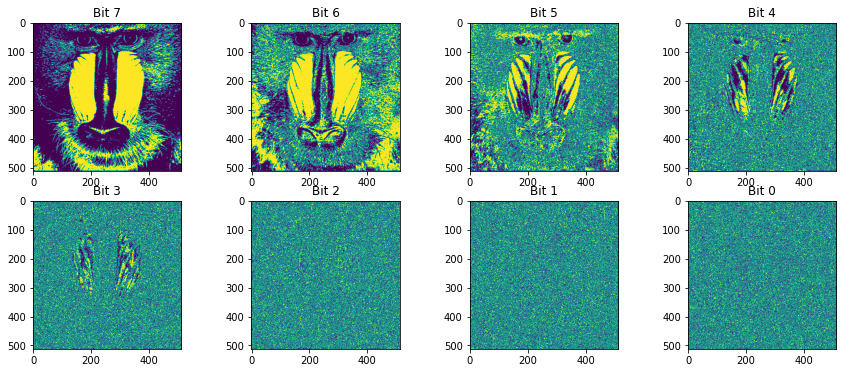

In [38]:
plot_all_bit_planes(img, width, height, 2)